In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.kde import gaussian_kde

from sklearn.linear_model import LinearRegression

In [17]:
np.random.seed(123)
height = np.random.normal(166, np.sqrt(3), 1000)
weight = np.random.exponential(1/50, 1000)
age = np.random.uniform(30, 60, 1000)+height*0.01+weight*0.8
features = [height, weight, age]
names = ['height', 'weight', 'age']

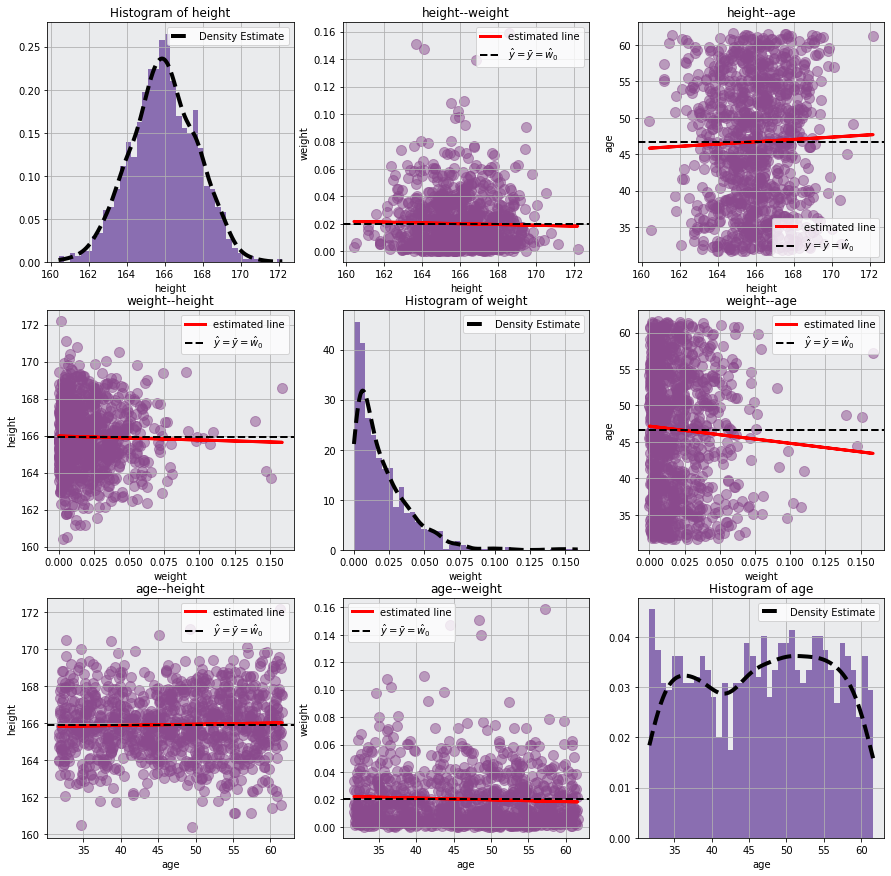

In [59]:
fig, ax = plt.subplots(3,3, figsize = (15, 15))

for i in range(3):
    for j in range(3):
        if i==j:
            #hist
            ax[i, j].hist(features[i], bins = 40, density = True, color = '#8a6eb1')
            ax[i, j].set_title(f'Histogram of {names[i]}')
            ax[i, j].set_xlabel(names[i])
            #Estimate and plot density
            density_model = gaussian_kde(features[i])
            x = np.linspace(min(features[i]), max(features[i]), 1000)
            ax[i, j].plot(x, density_model(x), label = 'Density Estimate', linestyle = '--', linewidth = 4, color = 'black')
            ax[i, j].legend()
        else:
            ax[i,j].scatter(features[i], features[j], color = '#8a4a8d', s = 100, alpha = 0.5)
            #scatter
            ax[i, j].set_title(f'{names[i]}--{names[j]}')
            ax[i, j].set_xlabel(names[i])
            ax[i, j].set_ylabel(names[j])
            
            model = LinearRegression()
            model.fit(features[i].reshape(-1, 1), features[j].reshape(-1, 1))
            y_pred = model.predict(features[i].reshape(-1, 1))
            
            ax[i, j].plot(features[i], y_pred, linewidth = 3, c = 'red', label = 'estimated line')
            ax[i, j].legend()
            ax[i, j].axhline(np.mean(features[j]), linestyle = '--', linewidth =2, 
                             c = 'black', label = r'$\hat{y} = \bar{y} = \hat{w}_0$')
            ax[i, j].legend()
        ax[i, j].set_facecolor('#eaebed')
        ax[i,j].grid()

In [2]:
from sklearn.datasets import load_iris

In [63]:
X = load_iris()['data']
y = load_iris()['target']

In [64]:
load_iris().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [66]:
load_iris()['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [68]:
load_iris()['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [73]:
X = pd.DataFrame(load_iris()['data'], columns = load_iris()['feature_names'])
y = load_iris()['target']

In [74]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


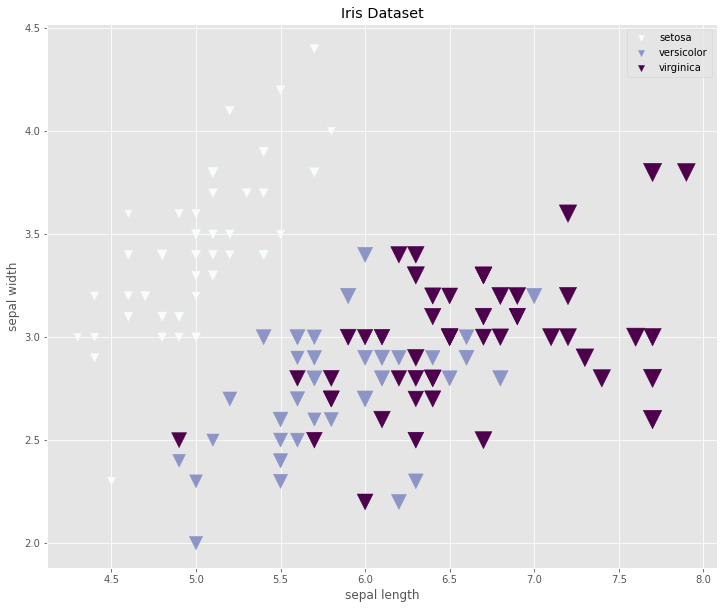

In [90]:
plt.style.use('ggplot')
plt.figure(figsize = (12,10))
sc = plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c = y, s= 50*X['petal length (cm)'], marker = 'v',
           cmap = 'BuPu')

plt.title('Iris Dataset')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(handles = sc.legend_elements()[0], labels = ['setosa', 'versicolor', 'virginica'])

In [3]:
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)
X, Y = np.meshgrid(x, y)

In [4]:
Z = np.sin(X)-4*np.cos(Y)

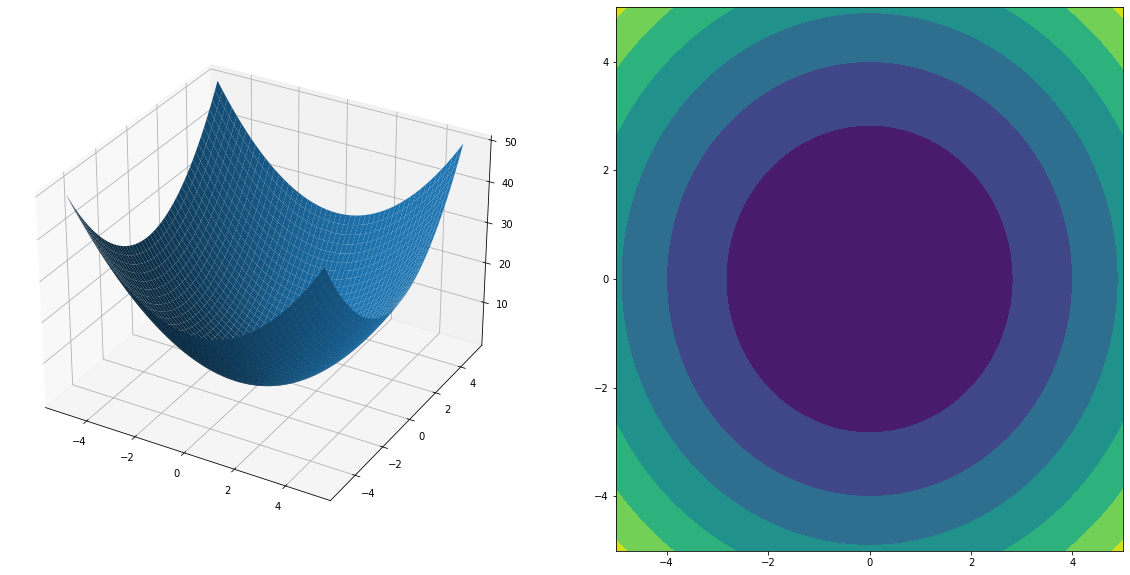

In [14]:
Z = X ** 2 + Y ** 2
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax.plot_surface(X,Y,Z)
ax = fig.add_subplot(1, 2, 2)
ax.contourf(X,Y,Z)